# Introduction

> This study aims to evaluate whether the average ACT score can be predicted by socioeconomic factors. The data were obtained from EdGap.org and NCES, including variables such as unemployment rate, median family income, educational attainment, percentage of students receiving free or reduced-price lunch, and charter school status. In addition, the analysis incorporates the poverty rate in neighborhoods surrounding schools to examine how local economic conditions influence academic performance. This additional variable provides more diversity in the analysis but may also introduce overlap, as it shares context with median income; therefore, both variables will be carefully examined when used together. The applied methodology includes data cleaning, analysis, and modeling to determine which socioeconomic factors most strongly affect the average ACT score. Besides that, the known limitation that the sample covers only about 20 states.

# Load Libraries
We start by importing the core libraries for data analysis and visualization. Pandas will be used for handling data, Numpy will be used for calculation methods, and Matplotlib/Seaborn will support charting.

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.anova as sms
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

# Load and inspect data

Load the EdGap data set

In [367]:
edgap = pd.read_excel(
  '../data/EdGap_data.xlsx', 
  dtype={'NCESSCH School ID': object})

/Users/congho/SU_Homework/data-5100-foundations-of-data-science/education/venv/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [368]:
school_information = pd.read_csv(
  '../data/ccd_sch_029_1617_w_1a_11212017.csv', encoding='unicode_escape'
)

/var/folders/hm/_316rgmd4v763bh_ttk3pzkr0000gn/T/ipykernel_11764/3687044859.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv(


## Explore the contents of the data sets

### Start by looking at the head of each data frame

This will let us see the names of the columns and a few example values for each column. We can also check whether the data is in tidy format.

In [369]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

In [370]:
pd.set_option('display.max_columns', None)
school_information.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID   LEAID  \
0  Alabama Youth Services               1    NaN   AL-210  100002   
1  Alabama Youth Services               1    NaN   AL-210  100002   
2  Alabama Youth Services               1    NaN   AL-210  100002   
3  Alabama Youth Services               1    NaN   AL-210  100002   
4  Alabama Youth Services               1    NaN   AL-210  100002   

      ST_SCHID       NCESSCH     SCHID           MSTREET1 MSTREET2 MSTREET3  \
0  AL-210-0020  1.000020e+10  100277.0       P O Box 9486      NaN      NaN   
1  AL-210-0050  1.000020e+10  101667.0         P O Box 66      NaN      NaN   
2  AL-210-0060  1.000020e+10  101670.0         P O Box 66      NaN      NaN   
3  AL-210-0030  1.000020e+10  101705.0         P O Box 66      NaN      NaN   
4  AL-210-0040  1.000020e+10  101706.0  8950 Roebuck Blvd      NaN      NaN   

         MCITY MSTATE   MZIP MZIP4                     LSTREET1 LSTREET2  \
0   Birmingham     AL  35220   NaN  1000 Industrial School Road      NaN   
1     Mt Meigs     AL  36057   NaN           1601 County Rd. 57      NaN   
2     Mt Meigs     AL  36057   NaN       2109 Bashi Rd Bldg 509      NaN   
3  Mount Meigs     AL  36057   NaN  1000 Industrial School Road      NaN   
4   Birmingham     AL  35206   NaN            8950 Roebuck Blvd      NaN   

  LSTREET3        LCITY LSTATE   LZIP LZIP4          PHONE  \
0      NaN   Birmingham     AL  35220   NaN  (205)680-8574   
1      NaN   Prattville     AL  36067   NaN  (334)215-3850   
2      NaN  Thomasville     AL  36784   NaN  (334)215-3850   
3      NaN  Mount Meigs     AL  36057   NaN  (334)215-6039   
4      NaN   Birmingham     AL  35206   NaN  (205)838-4981   

                      WEBSITE SY_STATUS SY_STATUS_TEXT UPDATED_STATUS  \
0  http://www.dys.alabama.gov         1           Open              1   
1  http://www.dys.alabama.gov         1           Open              1   
2  http://www.dys.alabama.gov         1           Open              1   
3  http://www.dys.alabama.gov         1           Open              1   
4  http://www.dys.alabama.gov         1           Open              1   

  UPDATED_STATUS_TEXT EFFECTIVE_DATE       SCH_TYPE_TEXT SCH_TYPE  \
0                Open     03/03/2010  Alternative School        4   
1                Open     03/03/2010  Alternative School        4   
2                Open     03/03/2010  Alternative School        4   
3                Open     03/03/2010  Alternative School        4   
4                Open     03/03/2010  Alternative School        4   

  RECON_STATUS OUT_OF_STATE_FLAG CHARTER_TEXT CHARTAUTH1 CHARTAUTHN1  \
0           No                No           No        NaN         NaN   
1           No                No           No        NaN         NaN   
2           No                No           No        NaN         NaN   
3           No                No           No        NaN         NaN   
4           No                No           No        NaN         NaN   

  CHARTAUTH2 CHARTAUTHN2 NOGRADES G_PK_OFFERED G_KG_OFFERED G_1_OFFERED  \
0        NaN         NaN       No           No           No          No   
1        NaN         NaN       No           No           No          No   
2        NaN         NaN       No           No           No          No   
3        NaN         NaN       No           No           No          No   
4        NaN         NaN       No           No           No          No   

  G_2_OFFERED G_3_OFFERED G_4_OFFERED G_5_OFFERED G_6_OFFERED G_7_OFFERED  \
0          No          No         

Use the info method to check the data types, size of the data frame, and numbers of missing values

In [371]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [372]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

Based on the information of these dataset, we have some overall information that:
1. The school information data set is much larger then the EdGap data set. Clearly the EdGap data set does not include all schools.
2. There are missing value in EdGap data set.
3. Each data set is in a tidy, or long format.
4. The data types for the variables of interest look correct, but the school information identifier is an `object` in the EdGap data set and a `float64` in the school information data set.

Next we want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

Make a pair plot to explore relationships between the variables and regression lines and format the pair plot

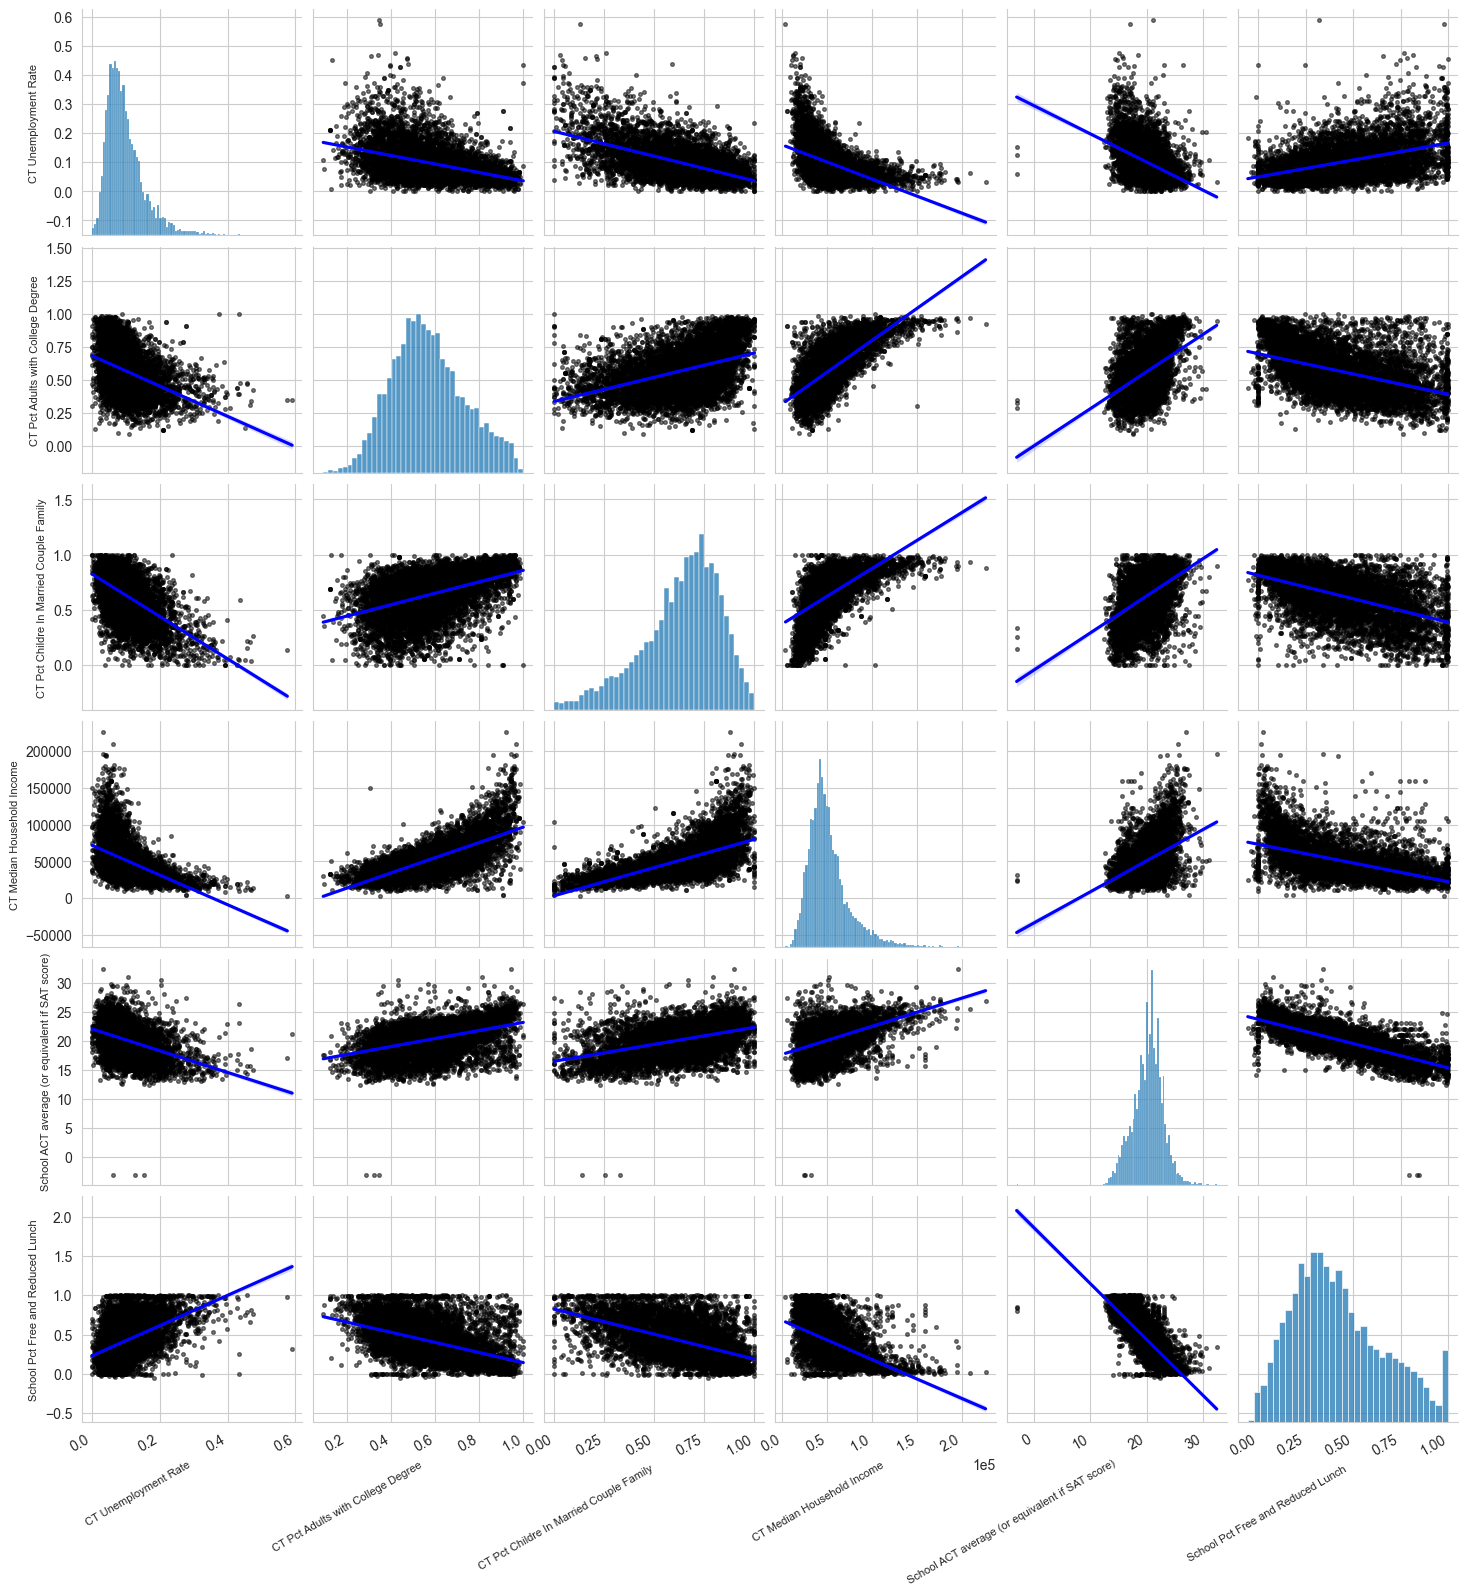

In [373]:
fig = sns.pairplot(
  edgap.drop(columns="NCESSCH School ID"),
  kind="reg",
  plot_kws={
    "line_kws": {"color": "blue"},
    "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
  }
)

for ax in fig.axes.flat:
  if ax.get_xlabel() == 'CT Median Household Income':
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Apply scientific notation
  ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
  ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size
  
  # Rotate x-axis tick labels
  plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
  
plt.show()

Plot a single row

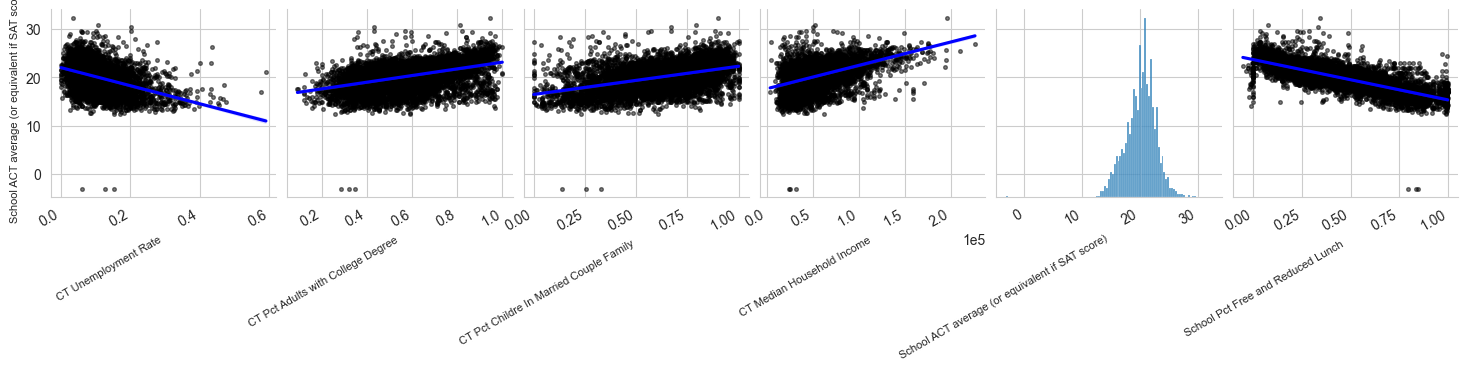

In [374]:
fig = sns.pairplot(
  edgap.drop(columns="NCESSCH School ID"),
  y_vars=['School ACT average (or equivalent if SAT score)'],
  kind="reg",
  plot_kws={
    "line_kws": {"color": "blue"},
    "scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
  }
)

for ax in fig.axes.flat:
  if ax.get_xlabel() == 'CT Median Household Income':
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Apply scientific notation
  ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
  ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size
  
  # Rotate x-axis tick labels
  plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
  
plt.show()

From the steps above, we know that:
1. There appears to be a relationship between the socioeconomic variables and the ACT score
2. There are some out-of-range ACT and percent lunch values that will need to be dealt with
3. We should have confidence that it is worthwhile to spend time preparing the data for analysis.

# Data cleaning and preparation

## Select relevent subsets of data

The school information data set contains many columns. We only need the year, school identity, location, and school type information.

Keep the columns SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL

In [375]:
school_information = school_information[
  ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

In [376]:
school_information.head()

SCHOOL_YEAR       NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL  \
0   2016-2017  1.000020e+10     AL  35220  Alternative School  High   
1   2016-2017  1.000020e+10     AL  36067  Alternative School  High   
2   2016-2017  1.000020e+10     AL  36784  Alternative School  High   
3   2016-2017  1.000020e+10     AL  36057  Alternative School  High   
4   2016-2017  1.000020e+10     AL  35206  Alternative School  High   

  CHARTER_TEXT  
0           No  
1           No  
2           No  
3           No  
4           No

## Rename columns

We will rename the columns to follow best practices of style and being informative. We will do it before joining data sets to make it obvious that the key has the same name in each data set.

In [377]:
edgap = edgap.rename(
  columns={
    "NCESSCH School ID": "id",
    "CT Unemployment Rate": "rate_unemployment",
    "CT Pct Adults with College Degree": "percent_college",
    "CT Pct Childre In Married Couple Family": "percent_married",
    "CT Median Household Income": "median_income",
    "School ACT average (or equivalent if SAT score)": "average_act",
    "School Pct Free and Reduced Lunch": "percent_lunch",
  }
)

Rename the columns SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL to year, id, state, zip_code, school_type, and schoo_level

In [378]:
school_information = school_information.rename(
  columns={
    'SCHOOL_YEAR': 'year', 
    'NCESSCH': 'id', 
    'LSTATE': 'state', 
    'LZIP': 'zip_code', 
    'SCH_TYPE_TEXT': 'school_type', 
    'LEVEL': 'school_level',
    'CHARTER_TEXT': 'charter'
  }
)

In [379]:
edgap.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [380]:
school_information.head()

year            id state zip_code         school_type school_level  \
0  2016-2017  1.000020e+10    AL    35220  Alternative School         High   
1  2016-2017  1.000020e+10    AL    36067  Alternative School         High   
2  2016-2017  1.000020e+10    AL    36784  Alternative School         High   
3  2016-2017  1.000020e+10    AL    36057  Alternative School         High   
4  2016-2017  1.000020e+10    AL    35206  Alternative School         High   

  charter  
0      No  
1      No  
2      No  
3      No  
4      No

From steps above we have that:
1. We selected a subset of columns of the school information data set.
2. We renamed the columns for clarity and follow formatting guidelines.
3. We are ready to join the data frames.

## Join data frames

We want to join the DataFrames using the identity of the school as the key. The identity is given by the NCESSCH school identity.
The value is an `string` in the school information data set after recreated and an `object` in the EdGap dataset.
We will cast the `id` column in the `EdGap` DataFrame as a `string` to be the same data type as the school information data set. We also changed the data type of zip code from `float` to `object`.

In [381]:
school_information['id'] = school_information['id'].astype('object')

In [382]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


Join the data frames and call the result df

In [383]:
df = edgap.merge(
  school_information,
  how='left',
  on='id'
)

In [384]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE    19804   
1        89320.0    19.498168       0.112412  2016-2017    DE    19709   
2        84140.0    19.554335       0.096816  2016-2017    DE    19709   
3        56500.0    17.737485       0.296960  2016-2017    DE    19958   
4        54015.0    18.245421       0.262641  2016-2017    DE    19934   

      school_type school_level charter  
0  Regular School         High     Yes  
1  Regular School         High      No  
2  Regular School         High      No  
3  Regular School         High      No  
4  Regular School         High      No

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


Now that we have a merged data frame that contain all information for analysis.

## Quality Control

There are natural bounds for the numerical variables in the data set. Check the minimum and maximum values in each column.

In [386]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch  
count  7986.000000    7986.000000  
mean     20.181532       0.420651  
std       2.595201       0.239754  
min      -3.070818      -0.054545  
25%      18.600000       0.238501  
50%      20.400000       0.381570  
75%      21.910867       0.575447  
max      32.362637       0.998729

From the information above, we know that the average_act and percent_lunch contain incorrect value as we know from the min value that contain negative value. Next, we need to set out-of-range values to NaN using Numpy library

In [387]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [388]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

We don't want to remove the entire row of incorrect value because we still want the other information so now they contain the NaN. Next we will check the school type and school level.

In [389]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [390]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [391]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

Since the ACT is for high school, so we keep only the high schools for analysis

In [392]:
df = df.loc[df['school_level'] == 'High']

Next, we need to check for any duplicated rows to prevent any incorrect value

In [393]:
df.duplicated().sum()

np.int64(0)

## Identify missing values

Let's check how many values of each variable are missing value

In [394]:
df.isna().sum().to_frame(name="Number of Missing Values")

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               3
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

From the frame above, we can see that we only missing values from the EdGap data set and the school information data set contain all value. Let's convert the number above to percentage of values of each variable

In [395]:
percent_missing = df.isna().mean().round(4) * 100

percent_missing.to_frame(name="Percent Missing Values")

Percent Missing Values
id                                   0.00
rate_unemployment                    0.17
percent_college                      0.15
percent_married                      0.28
median_income                        0.22
average_act                          0.04
percent_lunch                        0.28
year                                 0.00
state                                0.00
zip_code                             0.00
school_type                          0.00
school_level                         0.00
charter                              0.00

From the frame above, we can see that the percent missing value are really low, but lets check how many states that we collect data

In [396]:
df['state'].nunique()

20

So we know that the data only collected from 20 states due to omission. This is not evident by examining NaN values in the data set. As we focus in ACT and its percent of missing value is really low, so we drop the rows where the ACT score is missing

In [397]:
df = df.dropna(subset=['average_act'])

In [398]:
df.isna().sum().to_frame(name="Number of Missing Values")

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               0
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

Now that we have all the rows that contain all non-null values. If we drop rows that have NaNs for any socioeconomic variables, then we will negatively affect our analysis using the variableswhere data were present. So, we will not drop the rows in this data set that are missing the socioeconimic variables. We will impute the missing values.

## Data Imputation

Define the predictor variables to be `rate_unemployment`, `percent_college`, `percent_married`, `median_income`, `percent_lunch`, and `state`.

In [399]:
predictor_variables = [
  'rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter'
]

Use the iterative imputer to replace missing values in the columns corresponding to predictor variables in the analysis.

In [400]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [401]:
imputer = IterativeImputer()

Fit the imputer using the numerical predictor variables (this can include dummies for categorical variables). Define the columns to use in the imputation process.

In [402]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


Let's fit the imputer from those numerical predictors

In [403]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

Now we have learn the relations between those columns and then we can apply the transform method to actually replace the missing values

In [404]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

Next we can check for missing values to make sure non-null values in the data set

In [405]:
df.isna().sum().to_frame(name="Number of Missing Values")

Number of Missing Values
id                                        0
rate_unemployment                         0
percent_college                           0
percent_married                           0
median_income                             0
average_act                               0
percent_lunch                             0
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

Now we have cleaned data set and ready for analysis and saved the clean data frame as a csv file

In [406]:
df.to_csv(
  '../data/education_clean.csv',
  encoding='utf-8-sig',
  index=False
)

The cleaned data set save to in `../data/education_clean.csv`

# Exploratory data analysis

Plot the correlation matrix of the numerical variables in the training data to explore relationships between the variables.

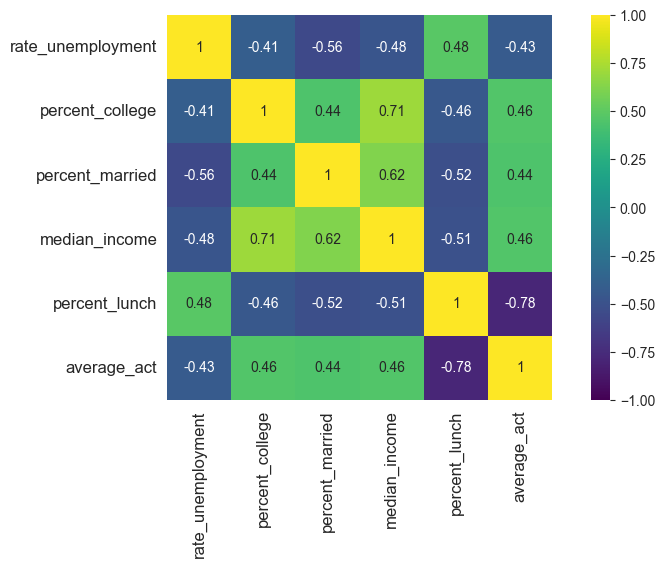

In [407]:
predictor_variables = [
  'rate_unemployment', 
  'percent_college', 
  'percent_married', 
  'median_income', 
  'percent_lunch'
]

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
  corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

We can see that all of the socioeconomic predictor variables have non neligible correlation coefficient with the average ACT. In fact, the correlation between percent lunch and average ACT is -0.78, which is quite large in magnitude. Next, let's make pair plots to explore relationships between the variables

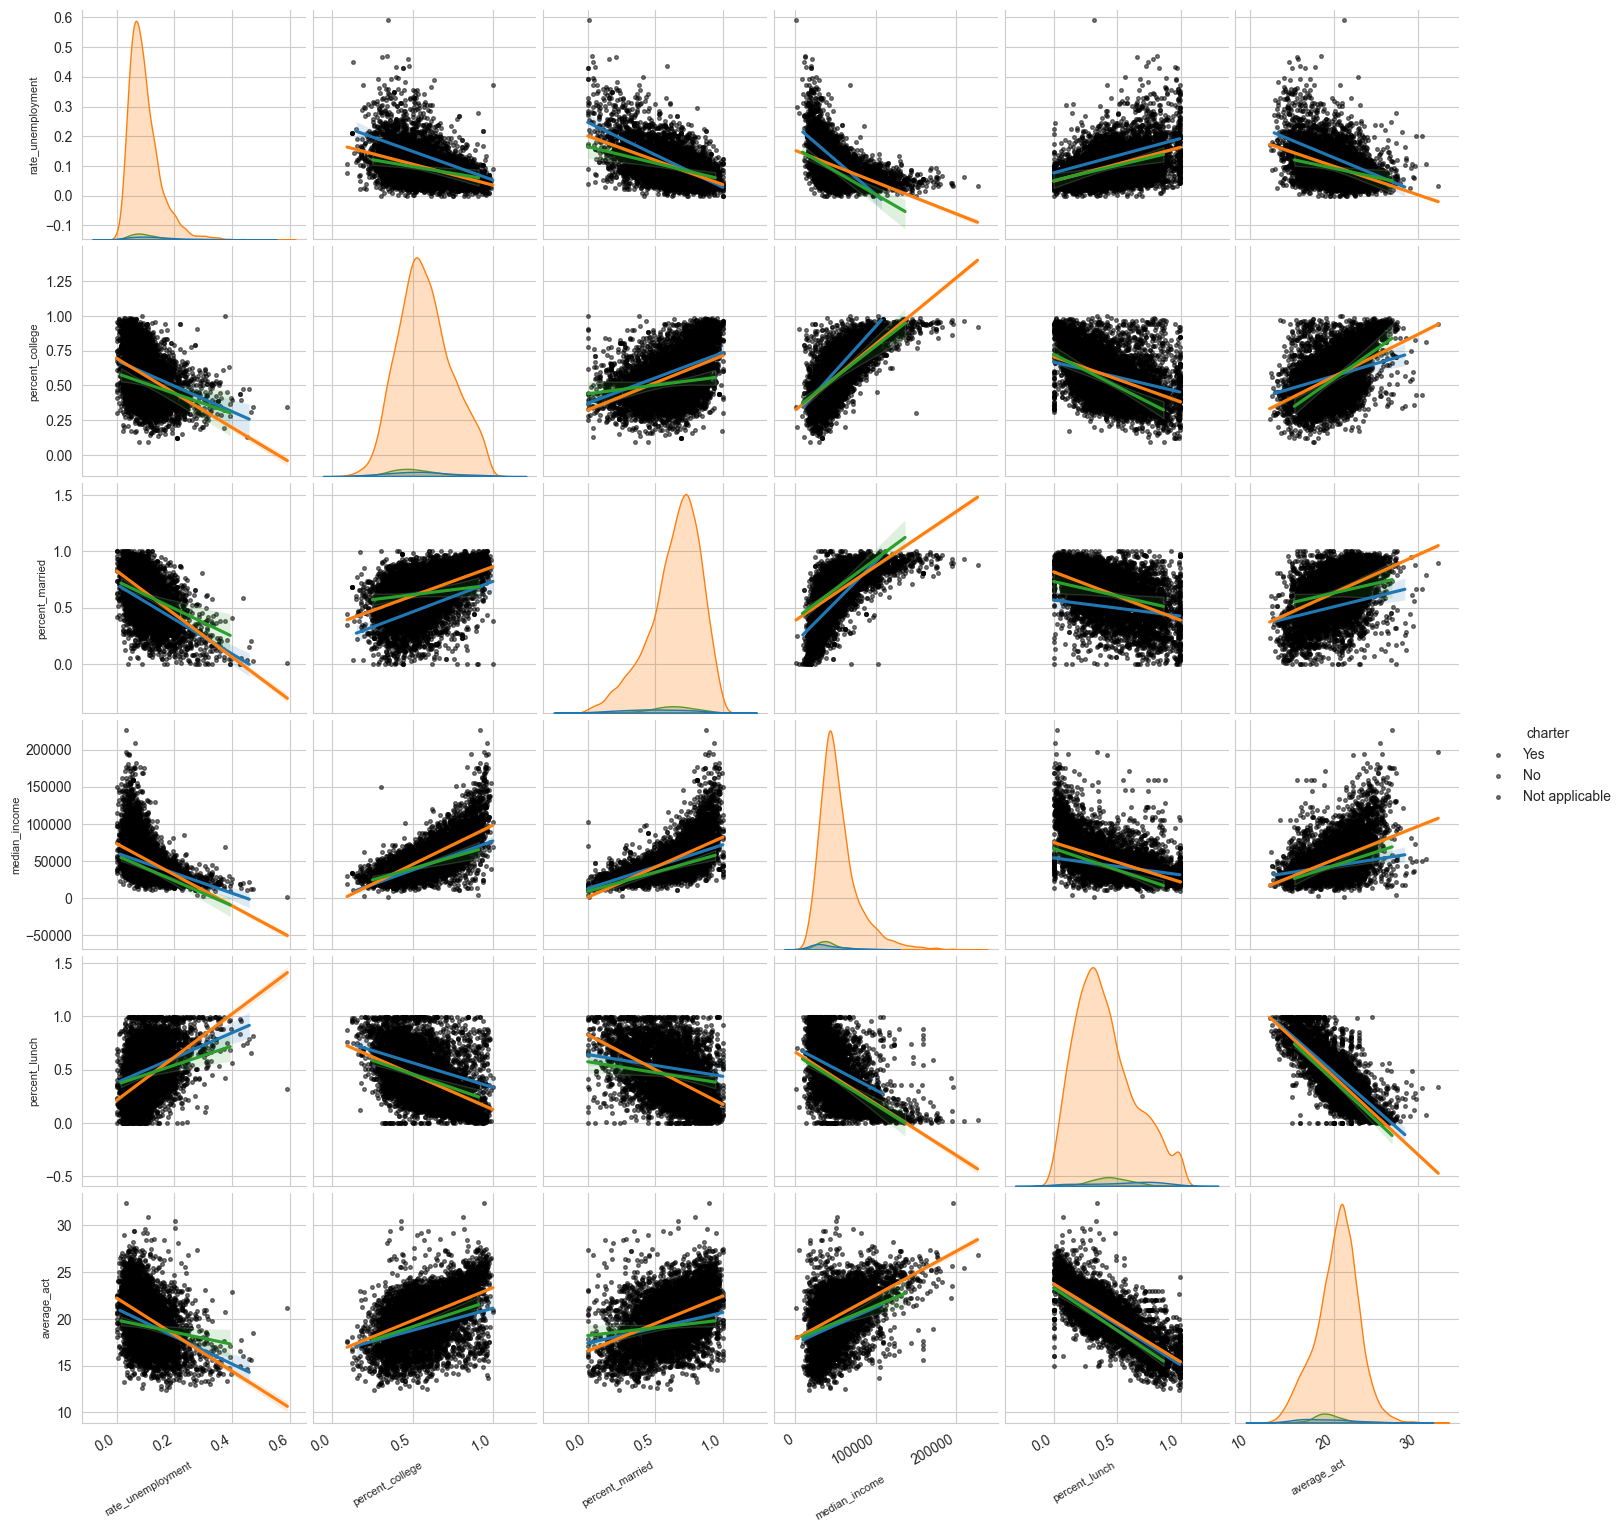

In [408]:
fig = sns.pairplot(
  data=df,
  vars=numerical_predictors + ['average_act'],
  hue='charter',
  kind='reg',
  plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},},
)

for ax in fig.axes.flat:
  if ax.get_xlabel() == 'CT Median Household Income':
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Apply scientific notation
  ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
  ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size
  
  # Rotate x-axis tick labels
  plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
  
plt.show()

as we can see in the bottom row of the pair plot, we note that the relationships are quite similar between the different values of whether a school is a charter school or not. Another thing to note is t look at what is the form of the relationship between each of these socioeconomic variables and the average ACT score.

## Identify ourliers

We can use the interquartile range to identify ourliers. This is also evident in boxplots of the data. Median income is on a very different scale than the other predictors, so we will make two plots to explore the data.

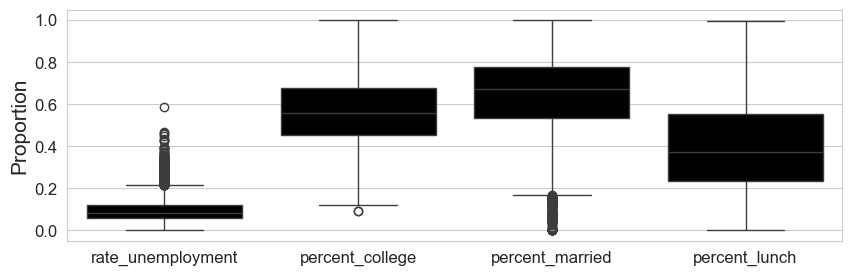

In [409]:
plt.figure(figsize=(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)
plt.tick_params(labelsize=12)

plt.show()

This boxplot does show us that the unemployment rate, percent college, and percent married do have outliers. However the values do not seem so far away from the majority of the data, nor do they seem like they are incorrect values so much that we would want to necessarily exclude them from our analysis.

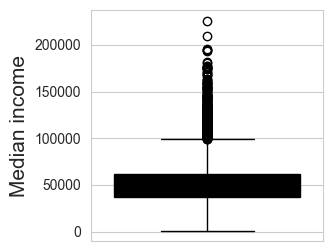

In [410]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y='median_income', color='k')

plt.ylabel('Median income', fontsize=15)

plt.show()

This boxplot of median income also has outliers, which typical of income distributions, these values while being technically ourliers, do not look as they are necessarily incorrect. But we should be mindful that these outliers are present in the data.

# Modeling

## Single input models

Fit and assess models predicting the average ACT score from each of the input variables. We might try polynomial linear regression models, as appropriate

### Median imcome

Plot the regression line and the scatter plot

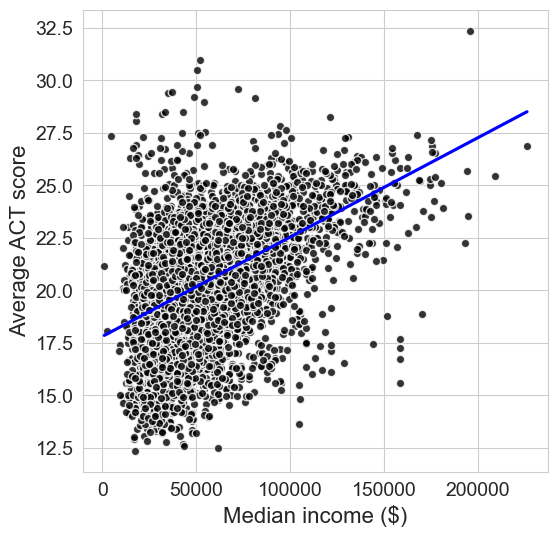

In [411]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

plt.xlabel('Median income ($)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

There is a relationship between the median income and the average ACT score, and it appears that this simple linear regression is providing only moderate fit of the data. Let's actually fit the model and then we will asses it using graphical and numerical methods

In [412]:
model_median_income = smf.ols(formula='average_act ~ median_income', data=df).fit()
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:14   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

This assessment tells us that the intercept in the model is 17.8 and the coefficient on median income is 4.732e-05. It is a very small coefficient because the median income is calculated in dollars and go over a large range, whereas the ACT score is over a much smaller range. We also interested in the statistical significance of the coefficient particularly the one on our predictor, and we can look in the column for the P values to see that they are small and zero up to three decimal places, so we have statistically significant coefficients. Let's compute the R-squared.

In [413]:
model_median_income.rsquared

np.float64(0.21118648979300614)

Compute the RMSE

In [414]:
y_hat = model_median_income.predict()

In [415]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

np.float64(2.228)

Compute the mean absolute error

In [416]:
mean_absolute_error(df['average_act'], y_hat)

1.7129386980688617

From the computation above, the model was not perfect, as we saw, that is a relatively small error in terms of the range of possible values for an ACT score. So it is saying that we are able to in some way predict the ACT score from this particular input variable. We would also like to asses the model using a graphical method and standard approach is to use a residual plot.

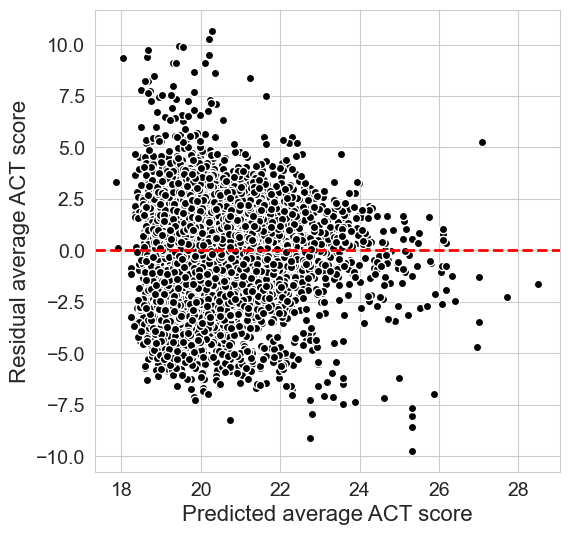

In [417]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

This plot is not purely a cloud of points, the error between what the actual value is and the prediction, that would suggest to use that an alternative model might give us an improvement over the model. So we might try a more complicated model and we could consider a quadratic polynomial regression model. Plot the regression curves and the scatter plot.

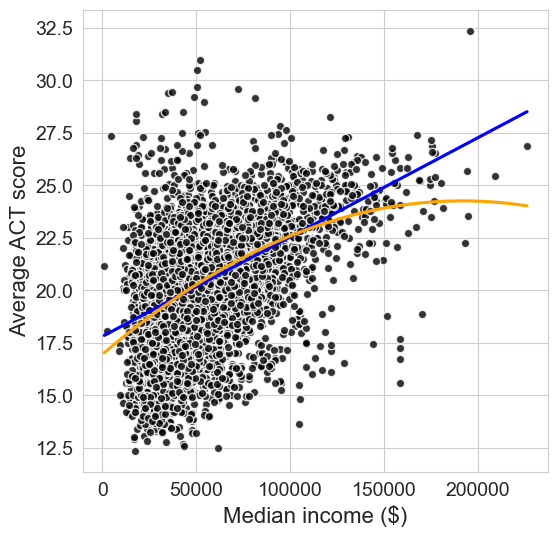

In [418]:
plt.figure(figsize=(6, 6))

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            order=2,
            color='orange',
            ci=False,
            scatter=False
            )

plt.xlabel("Median income ($)", fontsize=16)
plt.ylabel("Average ACT score", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

The qudratic model might provide a slightly better fit, but it is not clear that it is going to be significantly better than the simple linear regression. But we should fit the model and then consider the accuracy and the significance of the quadratic model.

In [419]:
model_median_income2 = smf.ols( # type: ignore
  formula='average_act ~ median_income + I(median_income**2)',
  data=df
).fit()

In [420]:
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:15   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

The summary shows that the R-squared is 0.219, and it is very slightly higher than the previous model. The coefficient on the squared term is statistically significant. It is not clear how much that is improving the model. So we have seen from this analysis that we do have a significant quadratic term as well as a significant linear term.

In [421]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.631899e-99
I(median_income ** 2)    1.395848e-17
dtype: float64

We can use an analysis of variance or ANOVA to compare these two nested plynomial linear regression models where we are comparing the simpler model to the more complicated model and statist significant in terms of its difference from the simpler model.

In [422]:
sms.anova_lm(model_median_income, model_median_income2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  35865.012794      0.0         NaN        NaN           NaN
1    7224.0  35505.105960      1.0  359.906834  73.227974  1.395848e-17

The P value being quite small and indicating that there is a statistically significant difference. The P value is in fact exactly the same as the P value on the coefficient for the squared term. Let's look at the accuracy of the quadratic model and we will use the mean absolute error.

In [423]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257968241

In [424]:
mean_absolute_error(df['average_act'], model_median_income.predict())

1.7129386980688617

The mean absolute error is 1.69, which if we compare this to the first model is smaller but not practically smaller. So this shows us that we have the ability to look at a relationship between one of our socioeconomic predictor variables and the average ACT score and formulate a model that provides some predictive power of what the ACT score acutally is, but it is a relatively weak prediction. We've also seen that a linear model is probably going to be sufficient to predict the ACT score and that considering something like a quadratic is not necessary going to provide a much better fit.

### Rate Unemployment

Plot the regression line and the scatter plot

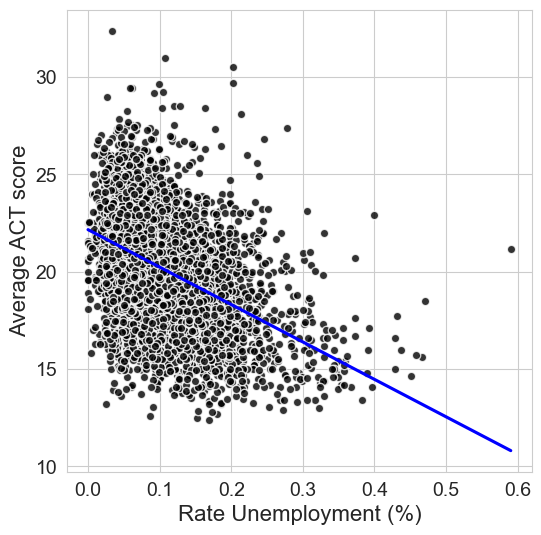

In [425]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x='rate_unemployment',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

plt.xlabel('Rate Unemployment (%)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

There is a relationship between the rate unemployment and the average ACT score, and it appears that this simple linear regression is providing only moderate fit of the data. Let's actually fit the model and then we will asses it using graphical and numerical methods

In [426]:
model_rate_unemployment = smf.ols(formula='average_act ~ rate_unemployment', data=df).fit()
print(model_rate_unemployment.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1669.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:15   Log-Likelihood:                -16149.
No. Observations:                7227   AIC:                         3.230e+04
Df Residuals:                    7225   BIC:                         3.232e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.1512      0.05

This assessment tells us that the intercept in the model is 22.15 and the coefficient on median income is -19.21. We also interested in the statistical significance of the coefficient particularly the one on our predictor, and we can look in the column for the P values to see that they are small and zero up to three decimal places, so we have statistically significant coefficients. Let's compute the R-squared.

Compute the RMSE

In [427]:
y_hat_unemployment = model_rate_unemployment.predict()

In [428]:
np.sqrt(mean_squared_error(df['average_act'], y_hat_unemployment)).round(3)

np.float64(2.261)

From the computation above, the model was not perfect, as we saw, that is a relatively small error in terms of the range of possible values for an ACT score. If we compare this with the median income model, which has RSME is about 1.713, that the median income model is better predictor of ACT score than unemployment rate. We would also like to asses the model using a graphical method and standard approach is to use a residual plot.

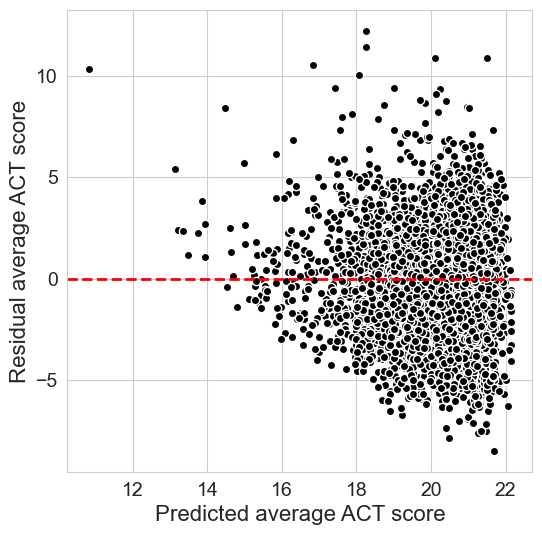

In [429]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat_unemployment, model_rate_unemployment.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

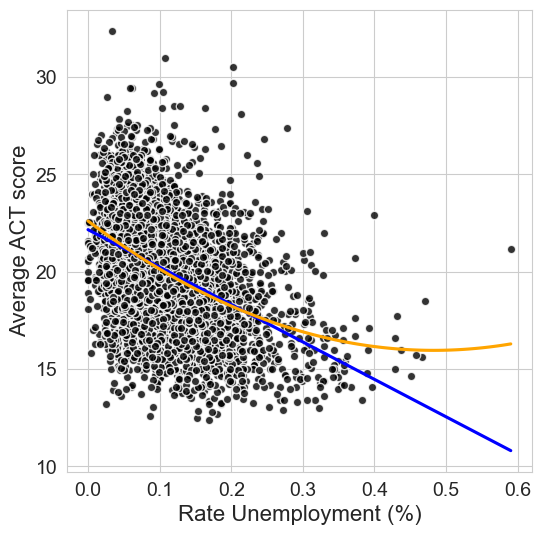

In [430]:
plt.figure(figsize=(6, 6))

sns.regplot(data=df,
            x='rate_unemployment',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

sns.regplot(data=df,
            x='rate_unemployment',
            y='average_act',
            order=2,
            color='orange',
            ci=False,
            scatter=False
            )

plt.xlabel("Rate Unemployment (%)", fontsize=16)
plt.ylabel("Average ACT score", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [431]:
model_rate_unemployment2 = smf.ols( # type: ignore
  formula='average_act ~ rate_unemployment + I(rate_unemployment**2)',
  data=df
).fit()

In [432]:
print(model_rate_unemployment2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     865.0
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:16   Log-Likelihood:                -16125.
No. Observations:                7227   AIC:                         3.226e+04
Df Residuals:                    7224   BIC:                         3.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

The summary shows that the R-squared is 0.193, and it is very slightly higher than the previous model. The coefficient on the squared term is statistically significant. It is not clear how much that is improving the model. So we have seen from this analysis that we do have a significant quadratic term as well as a significant linear term.

In [433]:
model_rate_unemployment2.pvalues

Intercept                     0.000000e+00
rate_unemployment            9.628233e-101
I(rate_unemployment ** 2)     2.360918e-12
dtype: float64

In [434]:
sms.anova_lm(model_rate_unemployment, model_rate_unemployment2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  36932.894308      0.0         NaN        NaN           NaN
1    7224.0  36682.406013      1.0  250.488295  49.329574  2.360918e-12

In [435]:
mean_absolute_error(df['average_act'], model_rate_unemployment2.predict())

1.7381981457701847

In [436]:
mean_absolute_error(df['average_act'], model_rate_unemployment.predict())

1.7421893796735084

The quadratic model techinically improve the model fit better but the improvement is tiny, from 0.188 to 0.193. The P value being quite small and indicating that there is a statistically significant difference. The P value is in fact exactly the same as the P value on the coefficient for the squared term. The mean absolute error is a little better than first model but not practically bigger. Therefore, the linear model is sufficient to predict ACT score and quadratic is not necessary.

### Percent College

Plot the regression line and the scatter plot

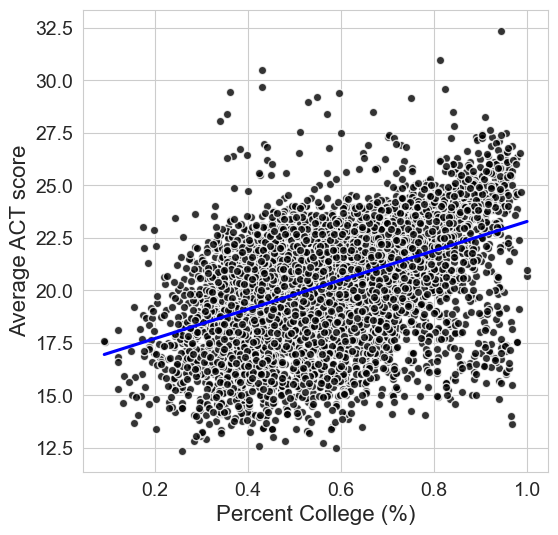

In [437]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x='percent_college',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

plt.xlabel('Percent College (%)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

There is a relationship between the rate unemployment and the average ACT score, and it appears that this simple linear regression is providing only moderate fit of the data. Let's actually fit the model and then we will asses it using graphical and numerical methods

In [438]:
model_percent_college = smf.ols(formula='average_act ~ percent_college', data=df).fit()
print(model_percent_college.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1922.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:17   Log-Likelihood:                -16048.
No. Observations:                7227   AIC:                         3.210e+04
Df Residuals:                    7225   BIC:                         3.211e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.3039      0.095    1

This assessment tells us that the intercept when the percent college at 0 is 16.304, and when the percent of college increase 0.01 then the average ACT score increase by about 0.0697. The R-squared show that about 21% of variation in ACT score can be explain by percent_college. The p-value also show that they are really small and zero up to three decimal places.

Compute the RMSE

In [439]:
y_hat_percent_college = model_percent_college.predict()

In [440]:
np.sqrt(mean_squared_error(df['average_act'], y_hat_percent_college)).round(3)

np.float64(2.229)

Compute the mean absolute error

In [441]:
mean_absolute_error(df['average_act'], y_hat_percent_college)

1.7169024235889725

From the computation above, the model was not perfect, as we saw, that is a relatively small error in terms of the range of possible values for an ACT score. So it is saying that we are able to in some way predict the ACT score from this particular input variable. We would also like to asses the model using a graphical method and standard approach is to use a residual plot.

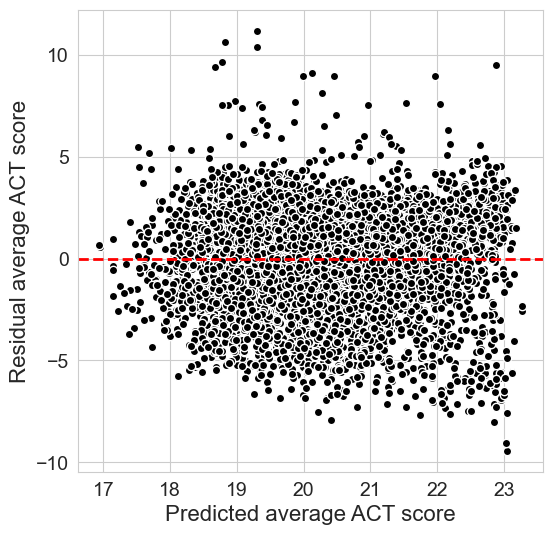

In [442]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat_percent_college, model_percent_college.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

This plot is a cloud of point and look randomly scattered around zero. It looks like the area with more college adults tend to have higher average ACT score, and the linear relationship describe the trend well. Therefore, the linear regression model is sufficient to predict the ACT score.

### Percent Married

Plot the regression line and the scatter plot

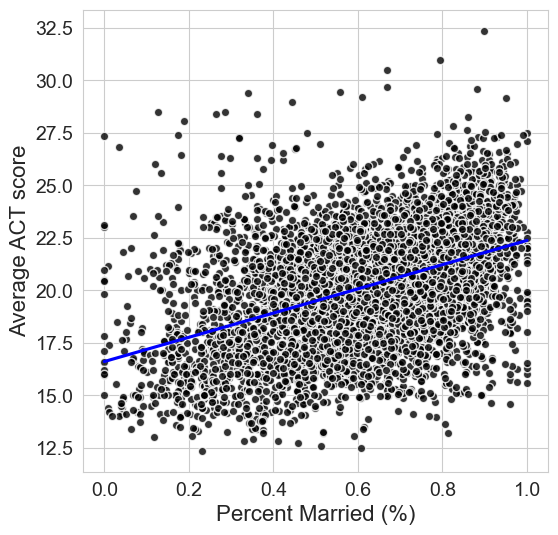

In [443]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x='percent_married',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

plt.xlabel('Percent Married (%)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

There is a relationship between the adult live in a married family and the average ACT score, and it appears that this simple linear regression is providing only moderate fit of the data. Let's actually fit the model and then we will asses it using graphical and numerical methods

In [444]:
model_percent_married = smf.ols(formula='average_act ~ percent_married', data=df).fit()
print(model_percent_married.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     1733.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:17   Log-Likelihood:                -16124.
No. Observations:                7227   AIC:                         3.225e+04
Df Residuals:                    7225   BIC:                         3.227e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.6046      0.093    1

This assessment tells us that the intercept when the percent college at 0 is 16.604, and when the percent of live in married family increase 0.01 then the average ACT score increase by about 0.058. The R-squared show that about 19% of variation in ACT score can be explain by percent_college. The p-value also show that they are really small and zero up to three decimal places.

Compute the RMSE

In [445]:
y_hat_percent_married = model_percent_married.predict()

In [446]:
np.sqrt(mean_squared_error(df['average_act'], y_hat_percent_married)).round(3)

np.float64(2.253)

Compute the mean absolute error

In [447]:
mean_absolute_error(df['average_act'], y_hat_percent_married)

1.7361820917022404

From the computation above, the model was not perfect, as we saw, that is a relatively small error in terms of the range of possible values for an ACT score. So it is saying that we are able to in some way predict the ACT score from this particular input variable. We would also like to asses the model using a graphical method and standard approach is to use a residual plot.

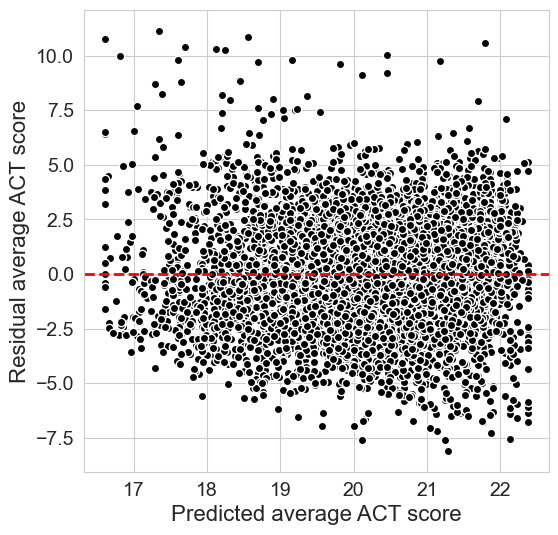

In [448]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat_percent_married, model_percent_married.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

This plot is a cloud of point and look randomly scattered around zero. It looks like the area with more adult live in a married family tend to have higher average ACT score, and the linear relationship describe the trend well. Therefore, the linear regression model is sufficient to predict the ACT score.

### Percent Lunch

Plot the regression line and the scatter plot

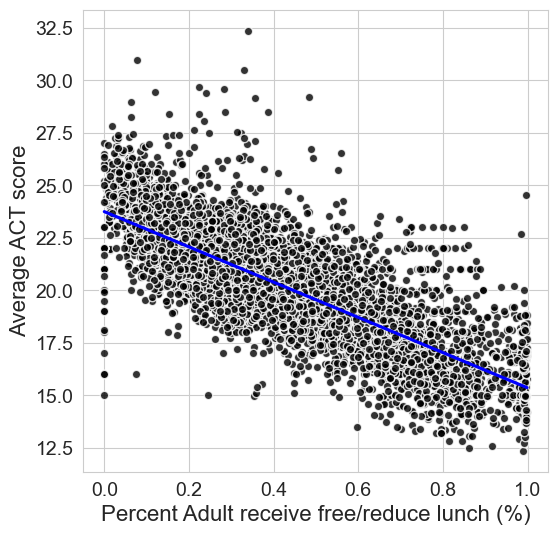

In [449]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x='percent_lunch',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

plt.xlabel('Percent Adult receive free/reduce lunch (%)', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

There is a relationship between the percent adult receive free/reduce price for lunch and the average ACT score, and it appears that this simple linear regression is providing only moderate fit of the data. Let's actually fit the model and then we will asses it using graphical and numerical methods

In [450]:
model_percent_lunch = smf.ols(formula='average_act ~ percent_lunch', data=df).fit()
print(model_percent_lunch.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                 1.149e+04
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:18   Log-Likelihood:                -13461.
No. Observations:                7227   AIC:                         2.693e+04
Df Residuals:                    7225   BIC:                         2.694e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.7429      0.037    641.745

This assessment tells us that the intercept when the percent college at 0 is 23.74, and when the percent of adult receive free or reduce price for lunch increase 0.01 then the average ACT score decrease by about 0.084. The R-squared show that about 61% of variation in ACT score can be explain by percent_lunch. The p-value also show that they are really small and zero up to three decimal places.

Compute the RMSE

In [451]:
y_hat_percent_lunch = model_percent_lunch.predict()

In [452]:
np.sqrt(mean_squared_error(df['average_act'], y_hat_percent_lunch)).round(3)

np.float64(1.559)

Compute the mean absolute error

In [453]:
mean_absolute_error(df['average_act'], y_hat_percent_lunch)

1.1689939374388465

From the computation above, the model was not perfect, as we saw, that is a relatively small error in terms of the range of possible values for an ACT score. So it is saying that we are able to in some way predict the ACT score from this particular input variable. We would also like to asses the model using a graphical method and standard approach is to use a residual plot.

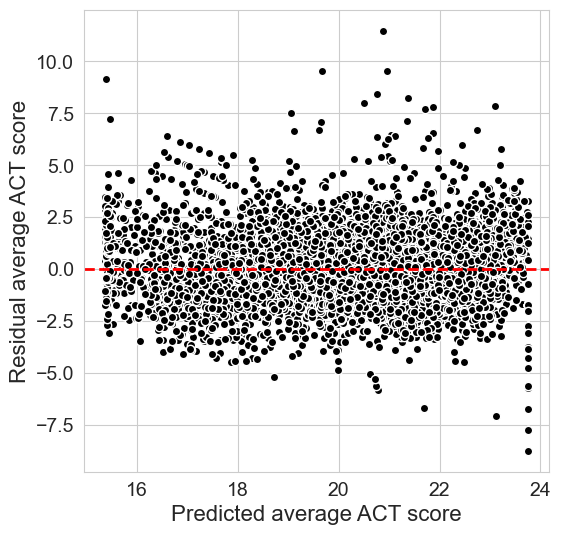

In [454]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat_percent_lunch, model_percent_lunch.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

The model using percent_lunch as a predictor is both statistically strong and practically meaningful. The linear regression captures a clear, negative relationship between socioeconomic disadvantage and ACT performance, explains most of the score variation, and produces unbiased residuals.

## Multiple linear regression

We are now going to fit a multiple linear regression model including all of the predictors that we would like to use in the model using all socioeconomic variables

In [455]:
model = smf.ols(
  formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch',
  data=df).fit()

In [456]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:18   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6972      0.13

We see that we have two of our model coefficients that are not statistically significant. The coefficient on percent_married and median_income have relatively large P values, indicating that they are not statistically significant. We noticed in our exploratory data analysis that there were correlations among these predictor variables, so it make sense that we do not need all of these predictors in a single model. We also note that the R-squared is roughly 0.63, which much higher than what we had seen with any of our individual predict models. We can use a residual plot for a graphical assessment of the model fit to see if we have used these predictor variables in the best way possible or if there's some transformation that we might apply to improve the fit.

In [457]:
y_hat = model.predict()

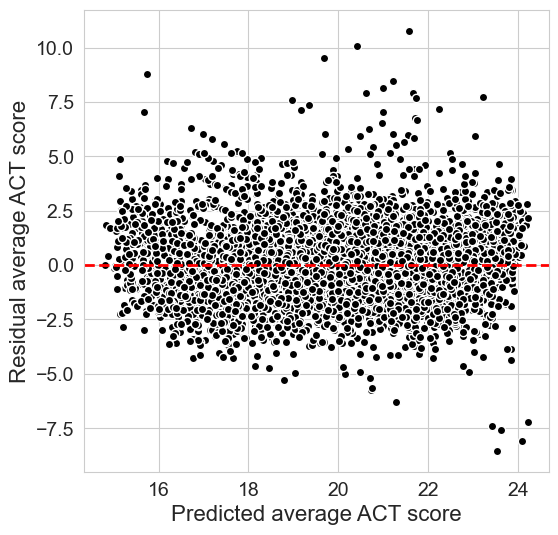

In [458]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

This plot shows that there is relatively no structure to the residual plot, indicating that we are unlikely to improve the model by making transformations of the input variables that we have used in the model. We can also do a numerical assessment of the accuracy of the model and looking at the mean absolute error.

In [459]:
mean_absolute_error(df['average_act'], model.predict())

1.1453304788871002

This is less than what we were seeing in the individual predictor models. After fitting the full multiple linear regression model including all of the socioeconomic predictor varables that we wanted to include, and finding that some of the coefficient were not statistically significant. We will fit a reduced model that only includes those predictor variables that has statistically significant coefficients and see if that reduced model is sufficient to predict the average ACT score. In this case, we only include unemployment rate, percent college, and the percent of students eligible for free or reduced price lunch in the model

In [460]:
model_reduced = smf.ols(
  formula='average_act ~ rate_unemployment + percent_college + percent_lunch',
  data=df).fit()

In [461]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:18   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6400      0.10

We do have all three of these variable having statistically significant coefficients. We can use a residual plot for a graphical assessment of this model fit and see that we have a very similar residual plot to what we had with the full model.

In [462]:
y_hat_reduced = model_reduced.predict()

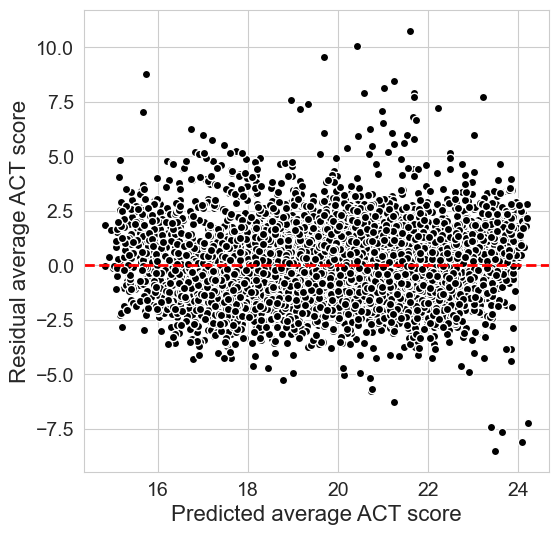

In [463]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat_reduced, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

This is again essentially no structure to the model, indicating that we do not need to include transformations of these particular predicotrs in order to improve the model. We can do a numerical assessment of the accuracy again using the mean absolute error.

In [464]:
mean_absolute_error(df['average_act'], model_reduced.predict())

1.1454832950346427

This looks very similar to what we had with the full model. In fact, when we compare the accuracy of the model in terms of the mean absolute error or R-squared between the reduced model and the full model that included all five predictor variables, they are essentially equivalent.

In [465]:
mae_full = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
              index=['full model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
full model                  1.1453     0.6280
reduced model               1.1455     0.6279

We can also consider the significance of the difference between the model using an ANOVA.

In [466]:
sms.anova_lm(model_reduced, model)

df_resid           ssr  df_diff   ss_diff         F    Pr(>F)
0    7223.0  16916.619167      0.0       NaN       NaN       NaN
1    7221.0  16915.612457      2.0  1.006711  0.214874  0.806648

We can see that there is no statistically significant difference between the reduced model that just included those three predictor variables and the larger model that had five of socioeconomic predictor variables. Now, we are going to scale the predictors in the reduced model so that they have a mean of 0 and a standard deviation of 1. So that we can use the magnitude of the coefficients in this model to compare the relative importance of each of those predictor variables at contributing to our estimate of the average ACT score.

In [467]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

In [468]:
scaled_columns = [var + '_normalized' for var in predictor_variables]

print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


In [469]:
scaler = StandardScaler().fit(df[predictor_variables])

In [470]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

Now let's check and see that these new variables do in fact have a mean of 0 and a standard deviation of 1. We might expect there to be some small differences just due to calculation error, and they do have means of essentially zero and standard deviations of one.

In [471]:
df[scaled_columns].agg(['mean', 'std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                           0.0                        -0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  
mean                      -0.0  
std                        1.0

So now we can fit the multiple linear regression model with those normalized predictors. So we will use again three values in the reduced model for them to have statistically significant coefficents. 

In [472]:
model_normalize = smf.ols(
  formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',
  data=df).fit()

In [473]:
print(model_normalize.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:18   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

We see that we have a much larger magnitude of a coefficient for the percent lunch variable than for either of the other two variables. So this says that the estimated change in the average ACT score is much larger magnitude when we would have a one standard deviation change in the percent lunch variable as comapred to the percent college or the unemployment rate variable. We may be noting that R squared value looks like it is the same as what we had with our reduced model. Let's compare the accuracy between the original and normalized models.

In [474]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalize.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalize.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R-squared': [r2_normalized, r2_reduced]},
              index=['normalized model', 'reduced model']).round(4)

Mean Absolute Error  R-squared
normalized model               1.1455     0.6279
reduced model                  1.1455     0.6279

In fact, when we compare all of these numerical measures, the mean absolute error or the R-squared, they are exactly the same between the model with the unscaled predictors and with these scaled predictors. This is because the transformation from the original predictors to the standardized versions does not lead to an overall change in the linear regression model, it is just changing what the coefficients in that model are .

## Additional Predictor: Neighborhood Poverty Rate

To extend the baseline socioeconomic model, I include the **neighborhood poverty rate** from the NCES School Neighborhood Poverty Estimates dataset as an additional predictor.  
While EdGap already provides school-level socioeconomic indicators such as median family income and percentage of students receiving free or reduced-price lunch, these metrics reflect conditions within schools. The neighborhood poverty rate, on the other hand, captures the broader **economic environment around the school**, which may influence access to resources, peer effects, and community support.  

This variable helps test whether the **local economic context** adds explanatory power beyond what school-level socioeconomic factors already capture.  
However, because poverty rate and median income are conceptually related, I will later check for multicollinearity and interpret results carefully when both are included in the same model.

Now we are going to load new dataset to get more variables

In [475]:
new_school_information = pd.read_csv('../data/School_Neighborhood_Poverty_Estimates%2C_2016-17.csv', encoding='unicode_escape')

Let's eplore the contents of new dataset to see the names of columns and a few example values for each columns. We also check whether the data is in tidy format.

In [476]:
new_school_information.head()

ï»¿X          Y      NCESSCH                              NAME  \
0 -86.628760  33.673667  10000200277  Sequoyah Sch - Chalkville Campus   
1 -86.532753  32.519175  10000201667                             Camps   
2 -87.750169  31.937797  10000201670                           Det Ctr   
3 -86.083210  32.375712  10000201705     Wallace Sch - Mt Meigs Campus   
4 -86.710585  33.586713  10000201706         McNeel Sch - Vacca Campus   

   IPR_EST  IPR_SE  OBJECTID    LAT1617    LON1617  
0      252     112         1  33.673661 -86.628755  
1      217      71         2  32.519169 -86.532748  
2      290      77         3  31.937791 -87.750164  
3      267      78         4  32.375706 -86.083205  
4      172      56         5  33.586707 -86.710580

Use the info method to check the data types, size of the data frame, and numbers of missing values

In [477]:
new_school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100623 entries, 0 to 100622
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ï»¿X      100623 non-null  float64
 1   Y         100623 non-null  float64
 2   NCESSCH   100623 non-null  int64  
 3   NAME      100623 non-null  object 
 4   IPR_EST   100623 non-null  int64  
 5   IPR_SE    100623 non-null  int64  
 6   OBJECTID  100623 non-null  int64  
 7   LAT1617   100623 non-null  float64
 8   LON1617   100623 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 6.9+ MB


From the information above, we can see that there is missing value. Next, we need to check for any duplicated rows to prevent any incorrect value

In [478]:
new_school_information.duplicated().sum()

np.int64(0)

The new school information data set contains many unrelated columns, so we only need the NCESSCH, IPR_EST and IPR_SE.

In [479]:
new_school_information = new_school_information[['NCESSCH', 'IPR_EST', 'IPR_SE']]

In [480]:
new_school_information.head()

NCESSCH  IPR_EST  IPR_SE
0  10000200277      252     112
1  10000201667      217      71
2  10000201670      290      77
3  10000201705      267      78
4  10000201706      172      56

We will rename the columns to follow best practices of style and being informative. We will do it before joining data sets to make it obvious that the key has the same name in each data set.

In [481]:
new_school_information = new_school_information.rename(
  columns={
    'NCESSCH': 'id',
    'IPR_EST': 'income_poverty_ratio_estimate',
    'IPR_SE': 'income_poverty_se'
  }
)

In [482]:
new_school_information.head()

id  income_poverty_ratio_estimate  income_poverty_se
0  10000200277                            252                112
1  10000201667                            217                 71
2  10000201670                            290                 77
3  10000201705                            267                 78
4  10000201706                            172                 56

We want to join the DataFrames using the identity of the school as the key. The identity is given by the NCESSCH school identity.
The value is an `int64` in the new school information data set after recreated and an `object` in the current dataset.
We will cast the `id` column in the id of the new school information to `object` to have the same type of current `Data Frame`

In [483]:
new_school_information['id'] = new_school_information['id'].astype('object')

In [484]:
new_school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100623 entries, 0 to 100622
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   id                             100623 non-null  object
 1   income_poverty_ratio_estimate  100623 non-null  int64 
 2   income_poverty_se              100623 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [485]:
new_df = df.merge(
  new_school_information,
  how='left',
  on='id'
)

In [486]:
new_df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE    19804   
1        89320.0    19.498168       0.112412  2016-2017    DE    19709   
2        84140.0    19.554335       0.096816  2016-2017    DE    19709   
3        56500.0    17.737485       0.296960  2016-2017    DE    19958   
4        54015.0    18.245421       0.262641  2016-2017    DE    19934   

      school_type school_level charter  rate_unemployment_normalized  \
0  Regular School         High     Yes                      0.380125   
1  Regular School         High      No                     -0.573936   
2  Regular School         High      No                     -0.706931   
3  Regular School         High      No                     -0.914109   
4  Regular School         High      No                     -0.343648   

   percent_college_normalized  percent_lunch_normalized  \
0                   -0.774475                 -1.466983   
1                    0.544280                 -1.272689   
2                    0.781372                 -1.339271   
3                    0.721933                 -0.484817   
4                    0.406606                 -0.631332   

   income_poverty_ratio_estimate  income_poverty_se  
0                            258                 92  
1                            527                 90  
2                            399                119  
3                            397                 81  
4                            281                 93

In [487]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227 entries, 0 to 7226
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             7227 non-null   object 
 1   rate_unemployment              7227 non-null   float64
 2   percent_college                7227 non-null   float64
 3   percent_married                7227 non-null   float64
 4   median_income                  7227 non-null   float64
 5   average_act                    7227 non-null   float64
 6   percent_lunch                  7227 non-null   float64
 7   year                           7227 non-null   object 
 8   state                          7227 non-null   object 
 9   zip_code                       7227 non-null   object 
 10  school_type                    7227 non-null   object 
 11  school_level                   7227 non-null   object 
 12  charter                        7227 non-null   o

Now that we have a merged data frame that contain one more variable for analysis. Let's check how many values of each variable are missing value when we add new variable.

In [488]:
new_df.isna().sum().to_frame(name="Number of Missing Values")

Number of Missing Values
id                                                    0
rate_unemployment                                     0
percent_college                                       0
percent_married                                       0
median_income                                         0
average_act                                           0
percent_lunch                                         0
year                                                  0
state                                                 0
zip_code                                              0
school_type                                           0
school_level                                          0
charter                                               0
rate_unemployment_normalized                          0
percent_college_normalized                            0
percent_lunch_normalized                              0
income_poverty_ratio_estimate                         0
income_poverty_se                                     0

So we can see that we don't have any missing value for new variable. Now we have cleaned data set and ready for next analysis and saved the clean data frame as a CVS file for second version

In [489]:
new_df.to_csv(
  '../data/education_clean_v2.csv',
  encoding='utf-8-sig',
  index=False
)

The cleaned data set save to in `../data/education_clean_v2.csv`

Plot the correlation matrix of the numerical variables in the training data to explore relationships between the variables.

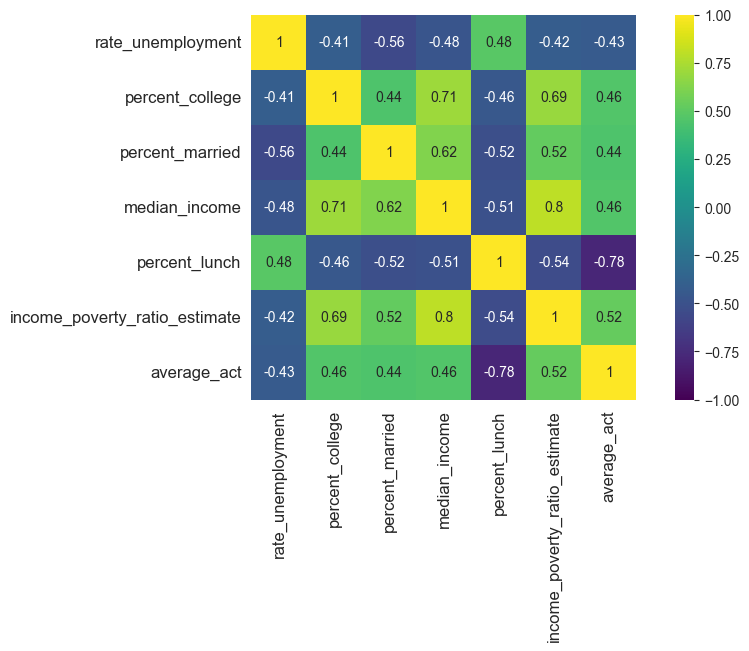

In [490]:
predictor_variables = [
  'rate_unemployment', 
  'percent_college', 
  'percent_married', 
  'median_income', 
  'percent_lunch',
  'income_poverty_ratio_estimate'
]

numerical_predictors = new_df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = new_df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
  corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

We can see that the correlation between income_poverty_ratio_estimate and average_act is 0.52, which is lager than other variables that have possitive correlation and it is the biggest in magnitude. Next, let's make pair plots to explore relationships between the variables

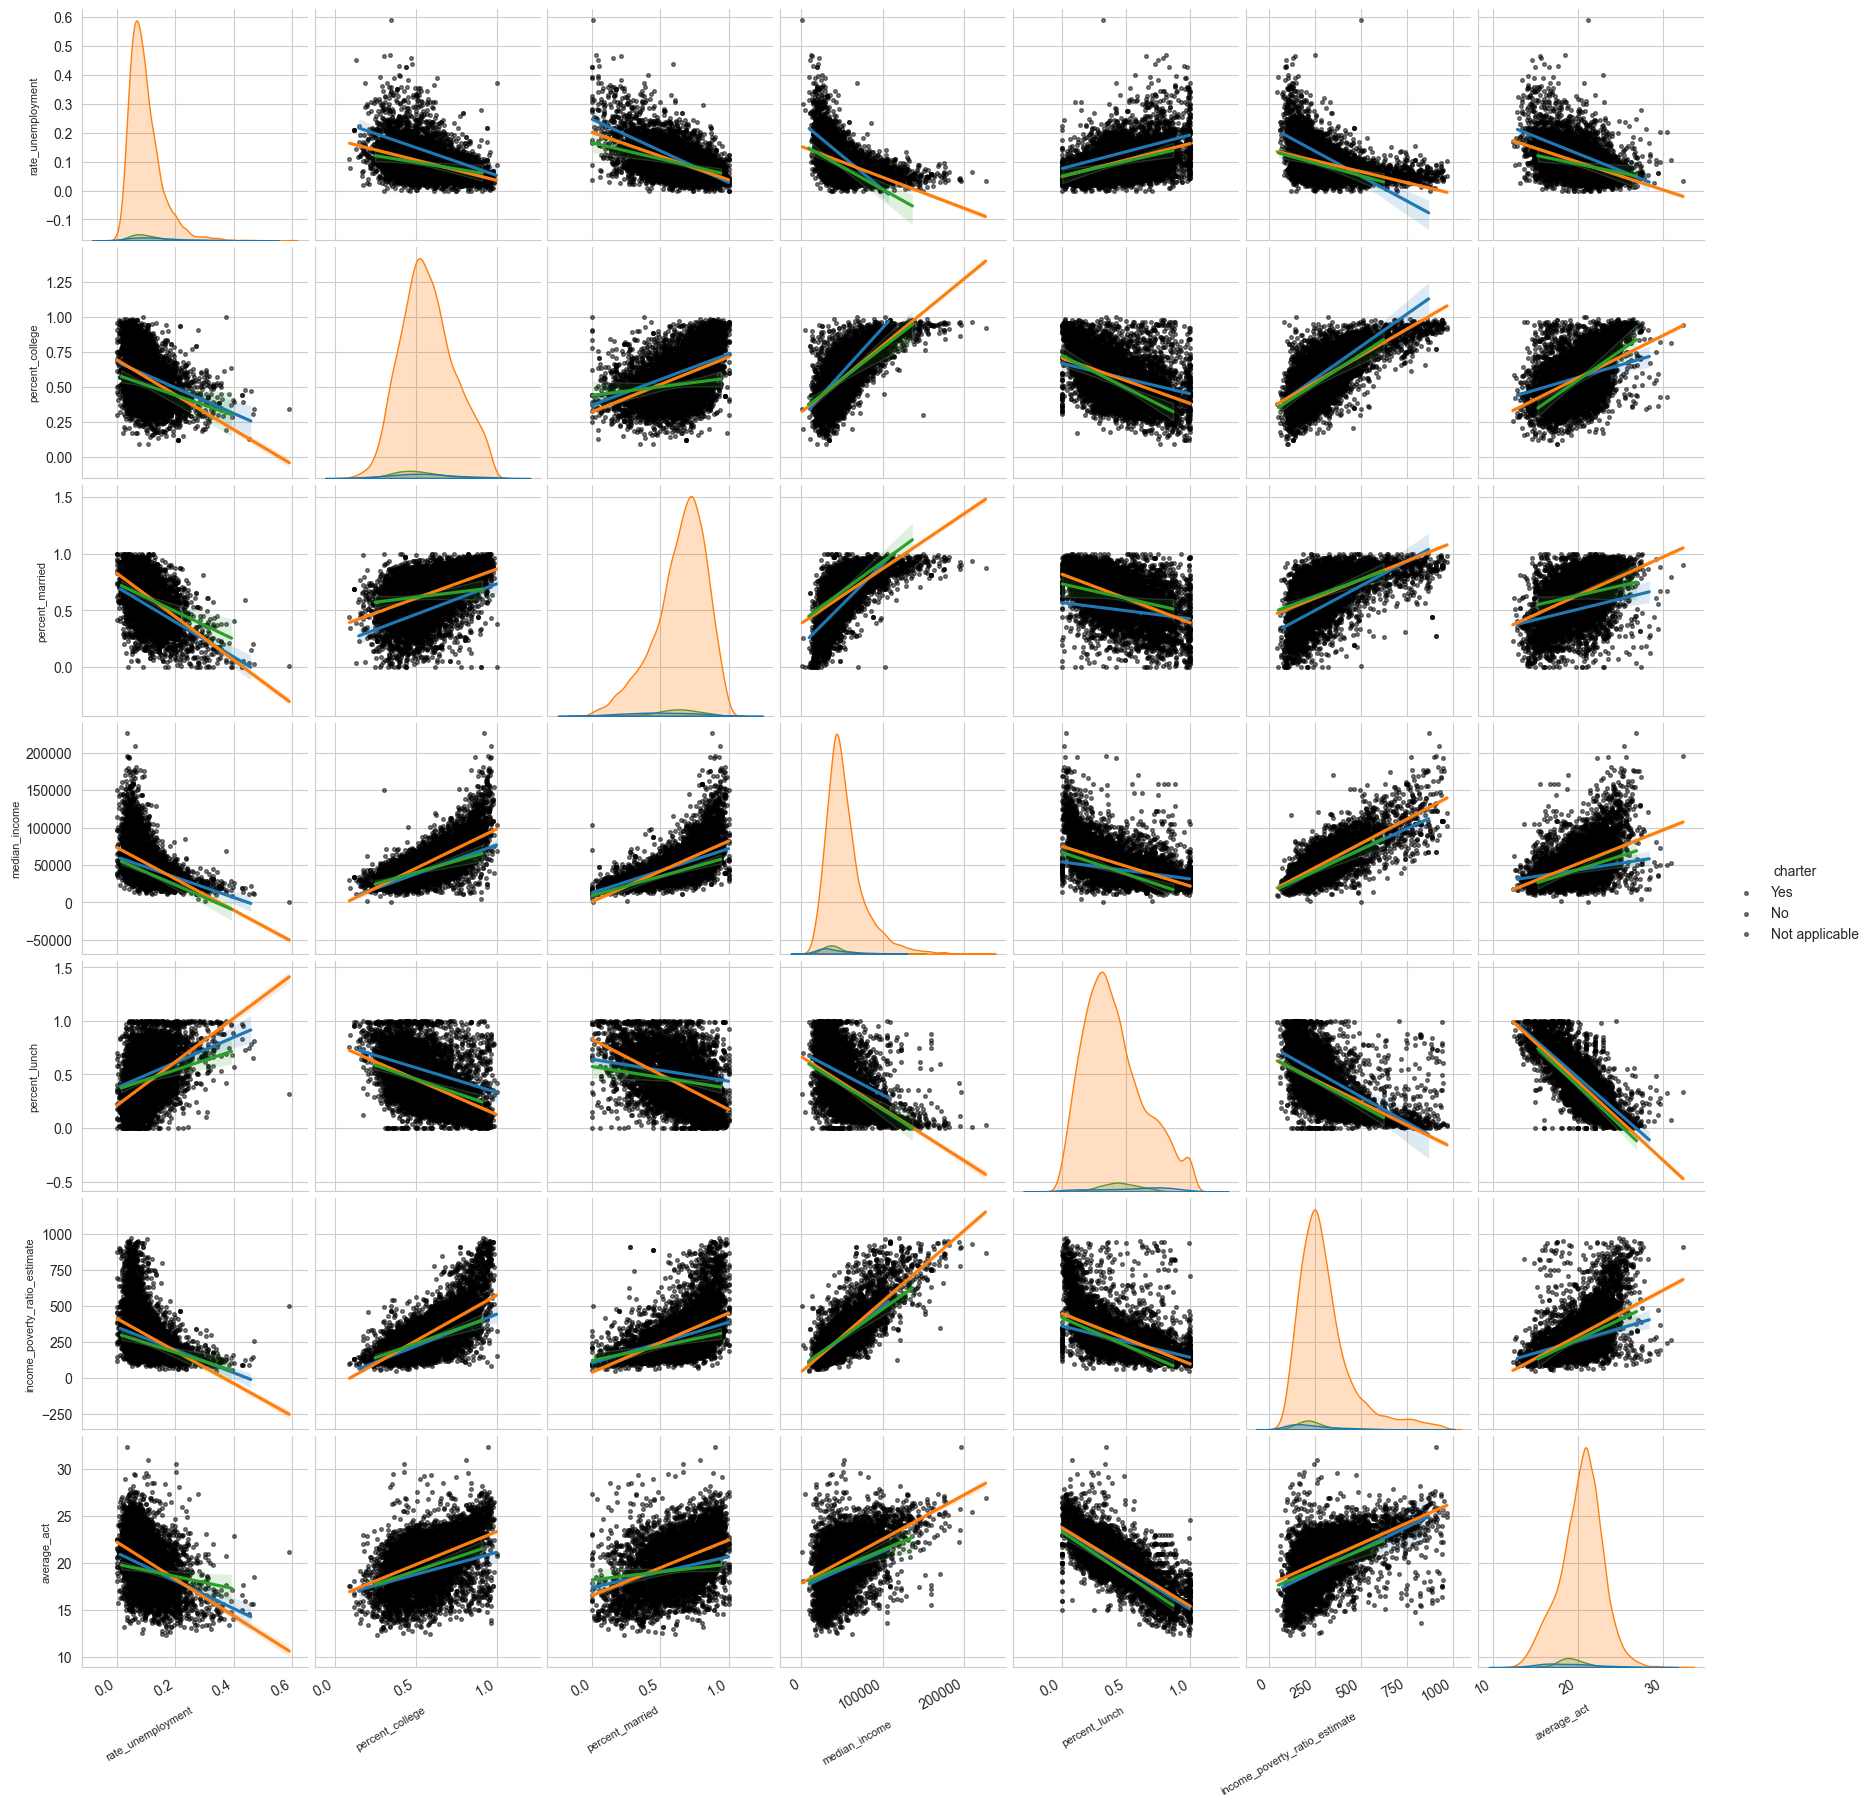

In [491]:
fig = sns.pairplot(
  data=new_df,
  vars=numerical_predictors + ['average_act'],
  hue='charter',
  kind='reg',
  plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},},
)

for ax in fig.axes.flat:
  if ax.get_xlabel() == 'CT Median Household Income':
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0)) # Apply scientific notation
  ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
  ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size
  
  # Rotate x-axis tick labels
  plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
  
plt.show()

We can use the interquartile range to identify ourliers. This is also evident in boxplots of the data for income_poverty_ratio_estimate

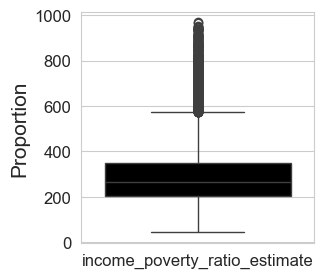

In [492]:
plt.figure(figsize=(3,3))

sns.boxplot(data=new_df[['income_poverty_ratio_estimate']], color='k')

plt.ylabel('Proportion', fontsize=15)
plt.tick_params(labelsize=12)

plt.show()

The boxplot shows that the income_poverty_ratio_estimate variable contains several outliers. These represent schools located in neighborhoods with income-to-poverty ratios significantly higher than most others, suggesting a skewed distribution toward higher-income areas. Let fit and assess the model predicting the average ACT score from income poverty ratio estimate.

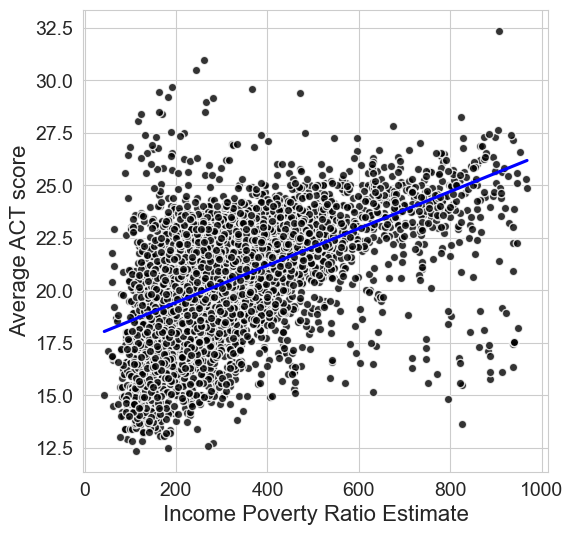

In [493]:
plt.figure(figsize=(6,6))

sns.regplot(data=new_df,
            x='income_poverty_ratio_estimate',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

plt.xlabel('Income Poverty Ratio Estimate', fontsize=16)
plt.ylabel('Average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

There is a relationship between the income poverty ratio estimate and the average ACT score, and it appears that this simple linear regression is providing only moderate fit of the data. Let's actually fit the model and then we will asses it using graphical and numerical methods

In [494]:
model_income_poverty_estimate = smf.ols(formula='average_act ~ income_poverty_ratio_estimate', data=new_df).fit()
print(model_income_poverty_estimate.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     2740.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:36   Log-Likelihood:                -15739.
No. Observations:                7227   AIC:                         3.148e+04
Df Residuals:                    7225   BIC:                         3.149e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

This assessment tells us that the intercept in the model is 17.65 and the coefficient on income_poverty_ratio_estimate is 0.0088. It is a small coefficient. We also interested in the statistical significance of the coefficient particularly the one on our predictor, and we can look in the column for the P values to see that they are small and zero up to three decimal places, so we have statistically significant coefficients. Let's compute the R-squared.

In [495]:
model_income_poverty_estimate.rsquared

np.float64(0.2749858672251153)

The R-squared show that about 27.5 variants in the average ACT score can be explained by the income_poverty_ratio_estimate. Let's compute the RMSE and the mean absolute error.

In [496]:
y_hat_income_poverty = model_income_poverty_estimate.predict()

In [497]:
np.sqrt(mean_squared_error(new_df['average_act'], y_hat_income_poverty)).round(3)

np.float64(2.136)

In [498]:
mean_absolute_error(df['average_act'], y_hat_income_poverty)

1.619754091555486

From the computation above, the model was not perfect, as we saw, that is a relatively small error in terms of the range of possible values for an ACT score. So it is saying that we are able to in some way predict the ACT score from this particular input variable. We would also like to asses the model using a graphical method and standard approach is to use a residual plot.

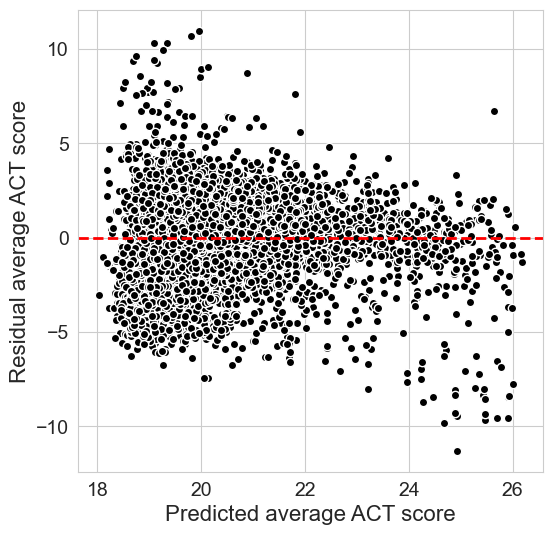

In [499]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat_income_poverty, model_income_poverty_estimate.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

From the plot we can see there is maybe a downward trend as predicted ACT score increase which might be overpredict for high ACT score. Since the plot is not purely a cloud of points, we might try a more complicated model and we could consider a quadratic polynomial regression model.

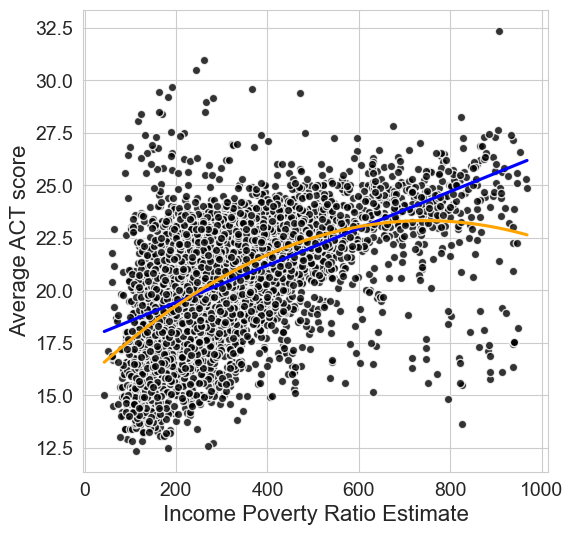

In [500]:
plt.figure(figsize=(6, 6))

sns.regplot(data=new_df,
            x='income_poverty_ratio_estimate',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1}
            )

sns.regplot(data=new_df,
            x='income_poverty_ratio_estimate',
            y='average_act',
            order=2,
            color='orange',
            ci=False,
            scatter=False
            )

plt.xlabel("Income Poverty Ratio Estimate", fontsize=16)
plt.ylabel("Average ACT score", fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

The qudratic model might provide a slightly better fit, but it is not clear that it is going to be significantly better than the simple linear regression. But we should fit the model and then consider the accuracy and the significance of the quadratic model.

In [501]:
model_income_poverty_estimate2 = smf.ols( # type: ignore
  formula='average_act ~ income_poverty_ratio_estimate + I(income_poverty_ratio_estimate**2)',
  data=new_df
).fit()

In [502]:
print(model_income_poverty_estimate2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     1649.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:37   Log-Likelihood:                -15542.
No. Observations:                7227   AIC:                         3.109e+04
Df Residuals:                    7224   BIC:                         3.111e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

The summary shows that the R-squared is 0.313, and it is very slightly higher than the previous model. The coefficient on the squared term is statistically significant. It is not clear how much that is improving the model. So we have seen from this analysis that we do have a significant quadratic term as well as a significant linear term.

In [503]:
model_income_poverty_estimate2.pvalues

Intercept                                 0.000000e+00
income_poverty_ratio_estimate            8.124518e-236
I(income_poverty_ratio_estimate ** 2)     1.553277e-87
dtype: float64

We can use an analysis of variance or ANOVA to compare these two nested polynomial linear regression models where we are comparing the simpler model to the more complicated model and statist significant in terms of its difference from the simpler model.

In [504]:
sms.anova_lm(model_income_poverty_estimate, model_income_poverty_estimate2)

df_resid           ssr  df_diff      ss_diff           F        Pr(>F)
0    7225.0  32964.244161      0.0          NaN         NaN           NaN
1    7224.0  31217.254238      1.0  1746.989923  404.271788  1.553277e-87

The P value being quite small and indicating that there is a statistically significant difference. The P value is in fact exactly the same as the P value on the coefficient for the squared term. Let's look at the accuracy of the quadratic model and we will use the mean absolute error.

In [505]:
mean_absolute_error(new_df['average_act'], model_income_poverty_estimate2.predict())

1.5685820578069967

In [506]:
mean_absolute_error(new_df['average_act'], model_income_poverty_estimate.predict())

1.619754091555486

The mean absolute error is 1.57, which if we compare this to the first model is smaller but not practically smaller. So this shows us that we have the ability to look at a relationship between one of our socioeconomic predictor variables and the average ACT score and formulate a model that provides some predictive power of what the ACT score acutally is, but it is a relatively weak prediction. We've also seen that a linear model is probably going to be sufficient to predict the ACT score and that considering something like a quadratic is not necessary going to provide a much better fit.

We are now going to fit a multiple linear regression model including all of the predictors that we would like to use in the model using all socioeconomic variables and a new variable to support more accuracy of predicting ACT score.

In [507]:
new_model = smf.ols(
  formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch + income_poverty_ratio_estimate',
  data=new_df).fit()

In [508]:
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2079.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:37   Log-Likelihood:                -13275.
No. Observations:                7227   AIC:                         2.656e+04
Df Residuals:                    7220   BIC:                         2.661e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

When income_poverty_ratio_estimate was added to the model, the coefficient for median_income became statistically significant. However, the change is likely due to multicollinearity among income-related variables rather than a new substantive effect. Both variables measure similar aspects of socioeconomic status, and the inflated condition number indicates instability in the estimates. To improve interpretability, one of these correlated predictors should be removed before drawing conclusions about income effects on ACT performance. We can use a residual plot for a graphical assessment of the model fit to see if we have used these predictor variables in the best way possible or if there's some transformation that we might apply to improve the fit.

In [509]:
new_y_hat = model.predict()

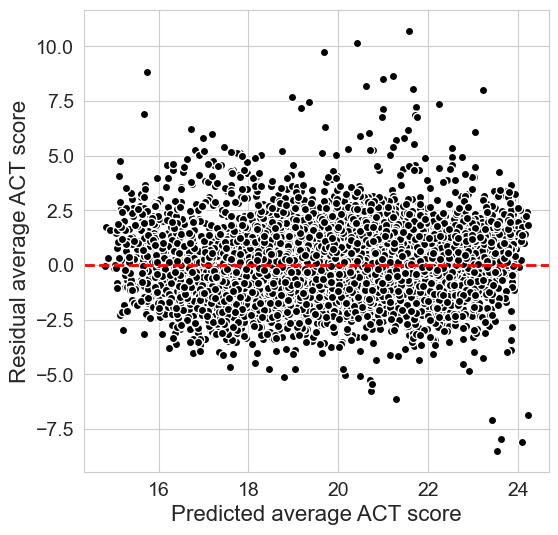

In [510]:
plt.figure(figsize=(6, 6))

plt.plot(new_y_hat, new_model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

This plot shows that there is relatively no structure to the residual plot, indicating that we are unlikely to improve the model by making transformations of the input variables that we have used in the model. We can also do a numerical assessment of the accuracy of the model and looking at the mean absolute error.

In [511]:
mean_absolute_error(new_df['average_act'], new_model.predict())

1.133779563385823

This is lees then the old model. Next we will fit a reduced model that only includes those predictor variables that has statistically significant coefficients and see if that reduced model is sufficient to predict the average ACT score. In this case, we only include unemployment rate, percent college, and the percent of students eligible for free or reduced price lunch, and income poverty ratio estimae in the model. Since the income_poverty_ratio_estimate is describe the context similar to the median income but it show the ratio income for the neighborhood around the school, not necessarily the actual income backgrounds of the enrolled students.

In [512]:
new_model_reduced = smf.ols(
  formula='average_act ~ rate_unemployment + percent_college + percent_lunch + income_poverty_ratio_estimate',
  data=new_df).fit()

In [513]:
print(new_model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     3094.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:37   Log-Likelihood:                -13293.
No. Observations:                7227   AIC:                         2.660e+04
Df Residuals:                    7222   BIC:                         2.663e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

We do have all four of these variables having statistically significant coefficients. We can use a residual plot for a graphical assessment of this model fit and see that we have a very similar residual plot to what we had with the full model.

In [514]:
new_y_hat_reduced = new_model_reduced.predict()

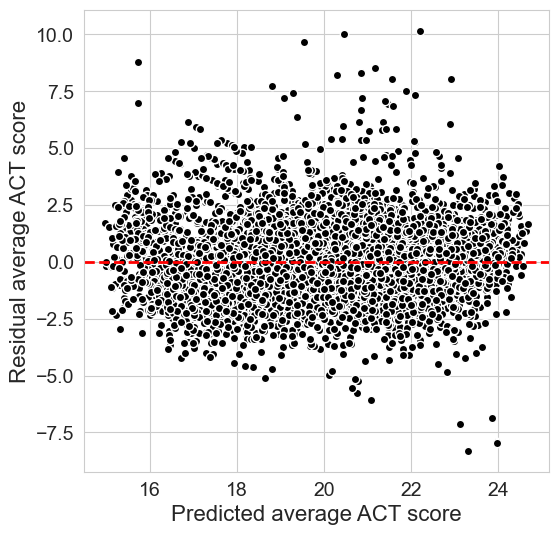

In [515]:
plt.figure(figsize=(6, 6))

plt.plot(new_y_hat_reduced, new_model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

This is again essentially no structure to the model, indicating that we do not need to include transformations of these particular predictors in order to improve the model. We can do a numerical assessment of the accuracy again using the mean absolute error.

In [516]:
mean_absolute_error(new_df['average_act'], new_model_reduced.predict())

1.1383027484766712

This look slightly larger than the full model. In fact, when we compare the accuracy of the model in terms of the mean absolute error or R-squared between the reduced model and the full model that included all six predictor variables, the reduced model has slightly smaller value.

In [517]:
new_mae_full = mean_absolute_error(new_df['average_act'], new_model.predict())
new_mae_reduced = mean_absolute_error(new_df['average_act'], new_model_reduced.predict())

new_r2_full = new_model.rsquared
new_r2_reduced = new_model_reduced.rsquared

pd.DataFrame({'New Mean Absolute Error': [new_mae_full, new_mae_reduced],
              'New R-squared': [new_r2_full, new_r2_reduced]},
              index=['new full model', 'new reduced model']).round(4)

New Mean Absolute Error  New R-squared
new full model                      1.1338         0.6333
new reduced model                   1.1383         0.6315

We can also consider the significance of the difference between the model using an ANOVA.

In [518]:
sms.anova_lm(new_model_reduced, new_model)

df_resid           ssr  df_diff    ss_diff          F        Pr(>F)
0    7222.0  16754.972033      0.0        NaN        NaN           NaN
1    7220.0  16670.754967      2.0  84.217066  18.236943  1.258157e-08

The reduced model is statistically equivalent to the full model in predictive accuracy (R² ≈ 0.63, MAE ≈ 1.14). The ANOVA test shows no significant loss of explanatory power after removing redundant predictors, confirming that simplifying the model improves interpretability without compromising performance. By replacing the median_income for the income_poverty_ratio_estimate made the new reduced model significant differences. Now, we are going to scale the predictors in the reduced model so that they have a mean of 0 and a standard deviation of 1. So that we can use the magnitude of the coefficients in this model to compare the relative importance of each of those predictor variables at contributing to our estimate of the average ACT score.

In [519]:
new_predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch', 'income_poverty_ratio_estimate']

In [520]:
new_scaled_columns = [var + '_normalized' for var in new_predictor_variables]

print(new_scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized', 'income_poverty_ratio_estimate_normalized']


In [521]:
new_scaler = StandardScaler().fit(new_df[new_predictor_variables])

In [522]:
new_df[new_scaled_columns] = new_scaler.transform(new_df[new_predictor_variables])

Now let's check and see that these new variables do in fact have a mean of 0 and a standard deviation of 1. We might expect there to be some small differences just due to calculation error, and they do have means of essentially zero and standard deviations of one.

In [523]:
new_df[new_scaled_columns].agg(['mean', 'std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                           0.0                        -0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  income_poverty_ratio_estimate_normalized  
mean                      -0.0                                      -0.0  
std                        1.0                                       1.0

So now we can fit the multiple linear regression model with those normalized predictors. So we will use again four values in the reduced model for them to have statistically significant coefficents. 

In [524]:
new_model_normalize = smf.ols(
  formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized + income_poverty_ratio_estimate_normalized',
  data=new_df).fit()

In [525]:
print(new_model_normalize.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     3094.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:10:37   Log-Likelihood:                -13293.
No. Observations:                7227   AIC:                         2.660e+04
Df Residuals:                    7222   BIC:                         2.663e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

We see that we still have a much larger magnitude of a coefficient for the percent lunch variable than for either of the other three variables. So this says that the estimated change in the average ACT score is much larger magnitude when we would have a one standard deviation change in the percent lunch variable as comapred to others variables. We may be noting that R squared value looks like it is the same as what we had with our reduced model. Let's compare the accuracy between the original and normalized models.

In [526]:
new_mae_normalized = mean_absolute_error(new_df['average_act'], new_model_normalize.predict())
new_mae_reduced = mean_absolute_error(new_df['average_act'], new_model_reduced.predict())

new_r2_normalized = new_model_normalize.rsquared
new_r2_reduced = new_model_reduced.rsquared

pd.DataFrame({'New Mean Absolute Error': [new_mae_normalized, new_mae_reduced],
              'New R-squared': [new_r2_normalized, new_r2_reduced]},
              index=['new normalized model', 'new reduced model']).round(4)

New Mean Absolute Error  New R-squared
new normalized model                   1.1383         0.6315
new reduced model                      1.1383         0.6315

In fact, when we compare all of these numerical measures, the mean absolute error or the R-squared, they are exactly the same between the model with the unscaled predictors and with these scaled predictors. This is because the transformation from the original predictors to the standardized versions does not lead to an overall change in the linear regression model, it is just changing what the coefficients in that model are .

# Conclusion
The answer to the orignal question is YES, the average ACT score is predicted by socioeconomic factors. In our data, percent free/reduced lunch is the strongest single predictor, while the full socioeconomic model explains ≈62–63% of variance. Adding neighborhood poverty (IPR) provides small but meaningful gains, and the reduced model with the poverty rate maybe is the best model for now to predict the ACT score